# **Aprendizagem de Máquina III (Tarefa de Regras de Associação)**

Grupo:
*   Gabriela Cristina Moreira dos Santos RA 156406
*   Lucas Guilherme Carvalho RA 156556



Este trabalho tem como objetivo identificar e descrever as melhores Regras de Associação para as casas presentes em diferentes classes sociais nos Estados Unidos. Para alcançar esse objetivo, utilizamos uma planilha contendo informações sobre as características das residências.

Detalhes sobre o dataset podem ser encontrados no seguinte [link](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/)

# **Explorando e Primeiros passos do Problema**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/House_Sale/kc_house_data_with_social_classes.csv') # abre o arquivo CSV 'train.csv' presente dentro do ZIP

In [ ]:
df.head() # mostra o cabeçalho presentes nas amostras do conjunto de treinamento

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Social Class
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,lower
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,lower middle
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,lower
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,lower middle
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,lower middle


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Social Class'],
      dtype='object')

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21611 non-null  float64
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
df.isnull().sum() # dados faltantes ou NaN

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Social Class     0
dtype: int64

In [ ]:
# como NaN sempre nos causa problemas, (1) retiramos esse atributo ou (2) preenchemos com valores médios
np.where(df['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [ ]:
print(df.values[10])
print(df.values[17])

[10 1736800520 '20150403T000000' 662500.0 3 2.5 3560 9796 1.0 0 0 3 8 nan
 1700 1965 0 98007 47.6007 -122.145 2210 8925 'upper middle']
[17 6865200140 '20140529T000000' 485000.0 4 1.0 1600 4300 1.5 0 0 4 7 nan
 0 1916 0 98103 47.6648 -122.343 1610 4300 'lower middle']


In [ ]:
df = df.drop([10, 17])

In [ ]:
df.isnull().sum() # dados faltantes ou NaN

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Social Class     0
dtype: int64

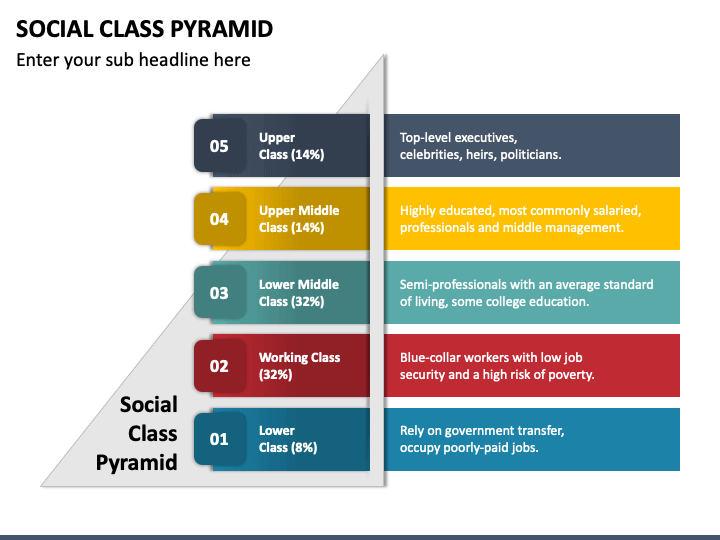

lower class < 234000 -> 8% of the population

234000 <= working class < 399500 -> 32% of the population

399500 <= lower middle class < 612000 -> 32% of the population

612000 <= upper middle class < 799000 -> 14% of the population

765000 <= upper class <= 1960000  -> 13% of the population

1960000 < toppest class 1% of the population

# **Análise Exploratória dos Dados e Pré Processamento para Rodar o algoritmo de Regras de Associação**

A partir deste ponto começamos as análises exploratórias, entendendo um pouco melhor o dataset, e removendo as colunas que não consideramos relevantes. Além disso, modificamos o dataset para que ele fique no formato necessário para que possa ser executado o algoritmo de regra de associação.

In [ ]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Social Class
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,lower
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,lower middle
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,lower
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,lower middle
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,lower middle


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Social Class'],
      dtype='object')

In [ ]:
data = df.drop(['price','id','Unnamed: 0', 'date', 'yr_built', 'yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15' ], axis=1) # remove as colunas que não considero importantes
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,lower
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,lower middle
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,lower
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,lower middle
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,lower middle


In [ ]:
import matplotlib.pyplot as plt

## **Plot do Histograma e Boxplot**

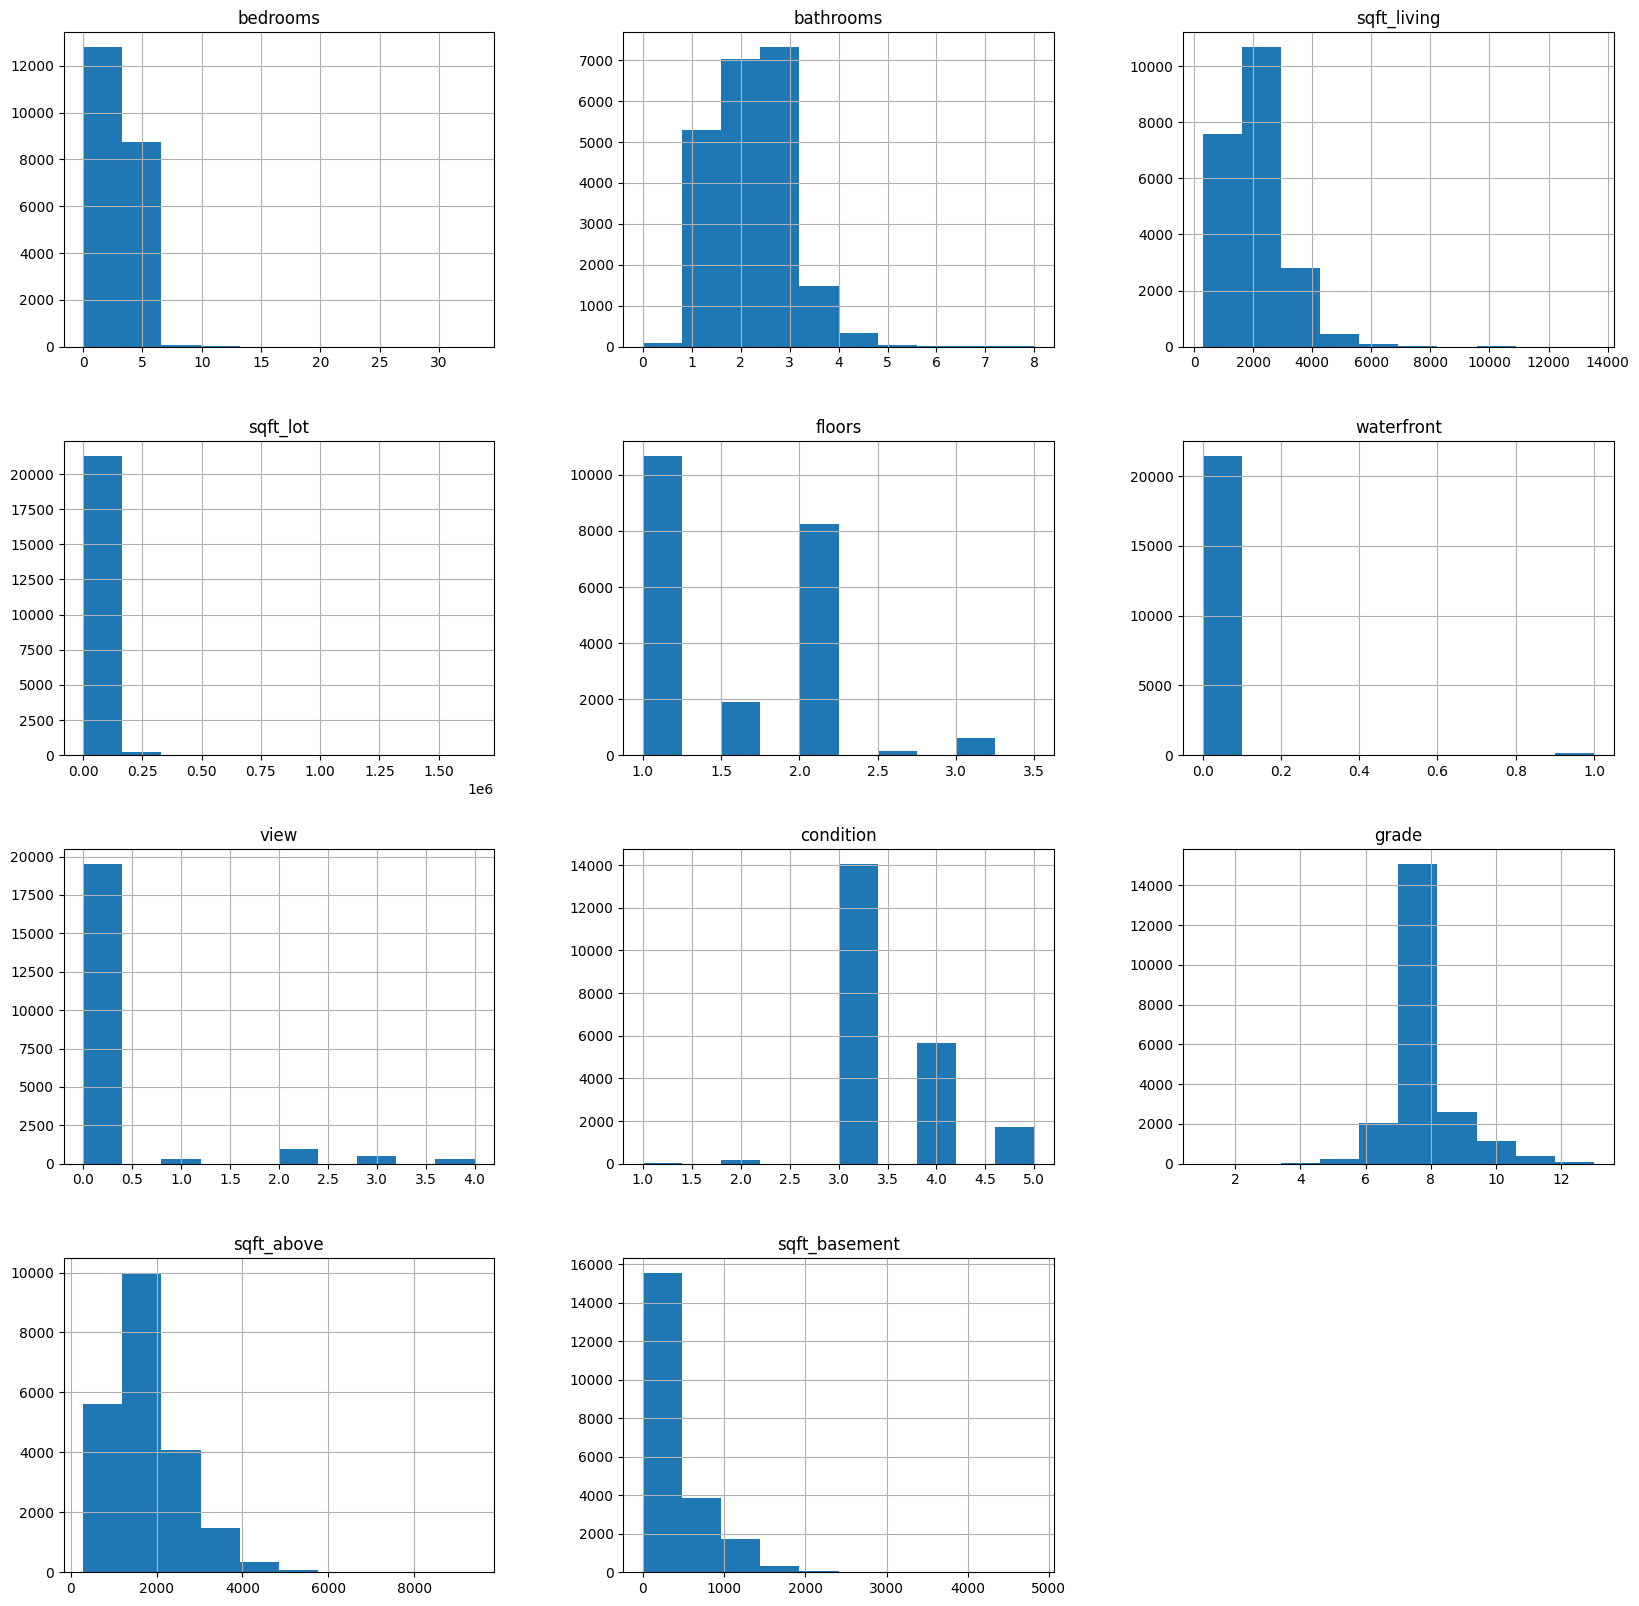

In [ ]:
# Plotar histograma para todas as colunas numéricas
data.hist(figsize=(20, 20))
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Nesta etapa fizemos a normalização dos dados continuos, para facilitar a clusterização, utilizando os quartis de acordo com os dados do boxplot

In [ ]:
# Inicializar o scaler
scaler = MinMaxScaler()

# Normalizar as colunas numéricas
cols_to_normalize = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

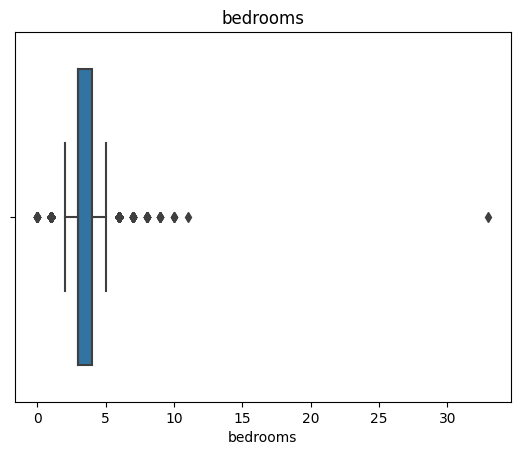

Valores do boxplot de 'bedrooms':
  Primeiro quartil: 3.0
  Mediana: 3.0
  Terceiro quartil: 4.0
  Máximo: 33.0



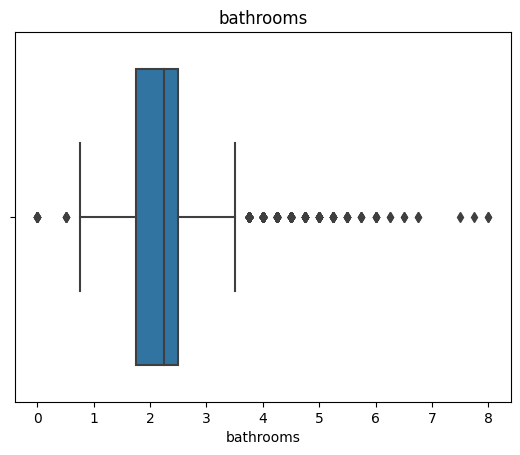

Valores do boxplot de 'bathrooms':
  Primeiro quartil: 1.75
  Mediana: 2.25
  Terceiro quartil: 2.5
  Máximo: 8.0



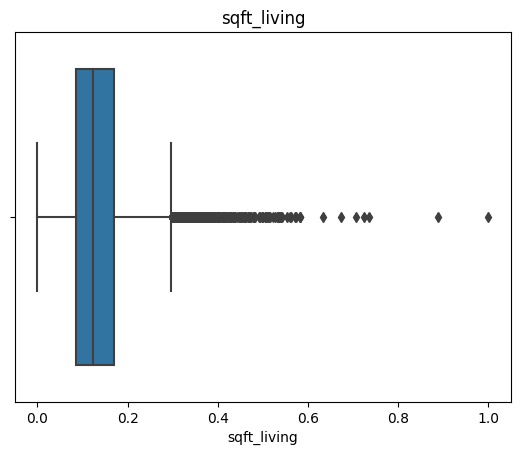

Valores do boxplot de 'sqft_living':
  Primeiro quartil: 0.08573584905660378
  Mediana: 0.12226415094339622
  Terceiro quartil: 0.17056603773584908
  Máximo: 1.0000000000000002



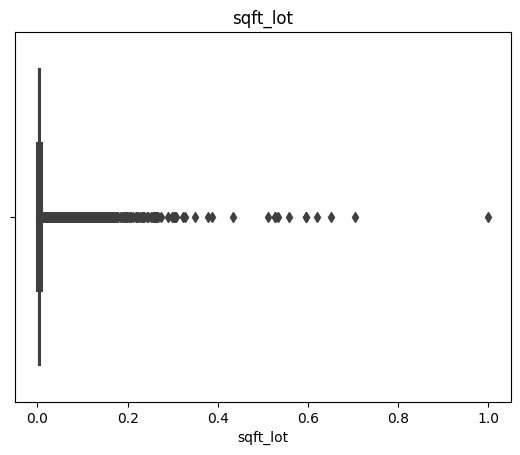

Valores do boxplot de 'sqft_lot':
  Primeiro quartil: 0.0027380017070107983
  Mediana: 0.004299631884151028
  Terceiro quartil: 0.006159595211889227
  Máximo: 0.9999999999999999



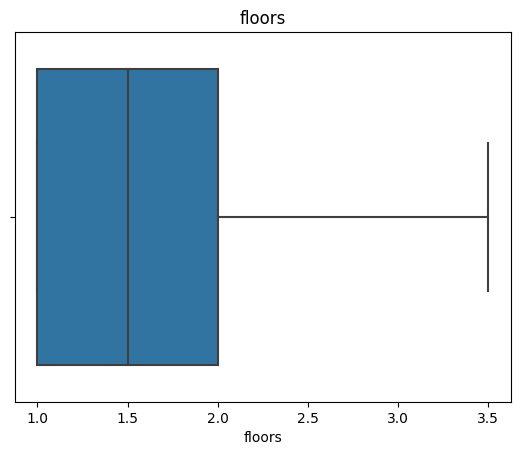

Valores do boxplot de 'floors':
  Primeiro quartil: 1.0
  Mediana: 1.5
  Terceiro quartil: 2.0
  Máximo: 3.5



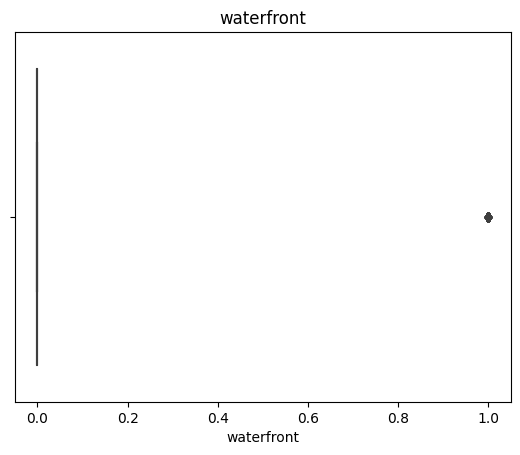

Valores do boxplot de 'waterfront':
  Primeiro quartil: 0.0
  Mediana: 0.0
  Terceiro quartil: 0.0
  Máximo: 1.0



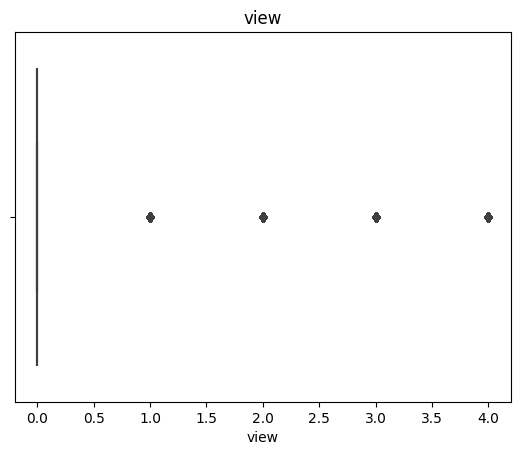

Valores do boxplot de 'view':
  Primeiro quartil: 0.0
  Mediana: 0.0
  Terceiro quartil: 0.0
  Máximo: 4.0



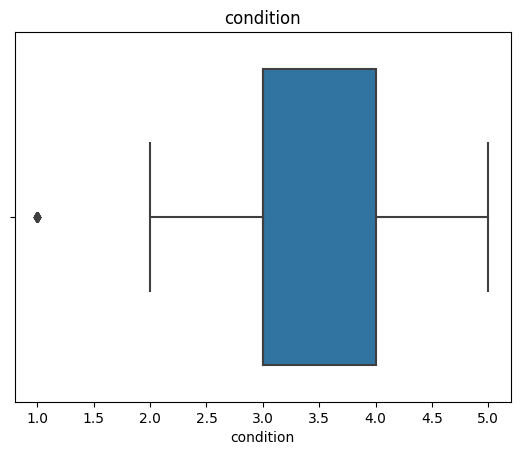

Valores do boxplot de 'condition':
  Primeiro quartil: 3.0
  Mediana: 3.0
  Terceiro quartil: 4.0
  Máximo: 5.0



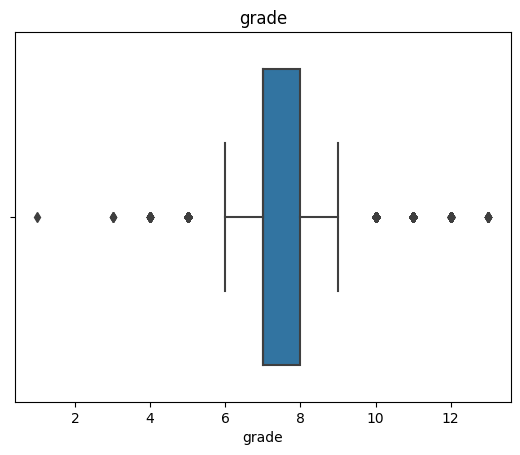

Valores do boxplot de 'grade':
  Primeiro quartil: 7.0
  Mediana: 7.0
  Terceiro quartil: 8.0
  Máximo: 13.0



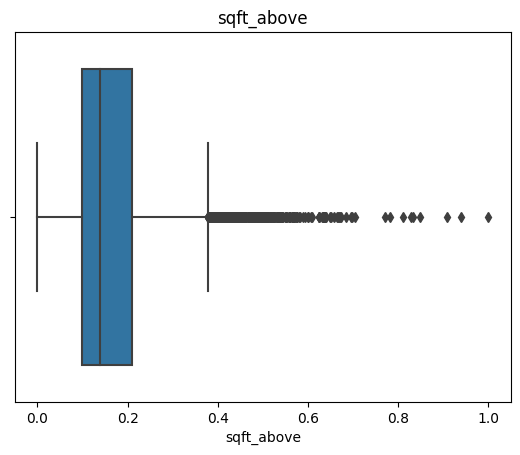

Valores do boxplot de 'sqft_above':
  Primeiro quartil: 0.09868421052631578
  Mediana: 0.1392543859649123
  Terceiro quartil: 0.21052631578947367
  Máximo: 1.0



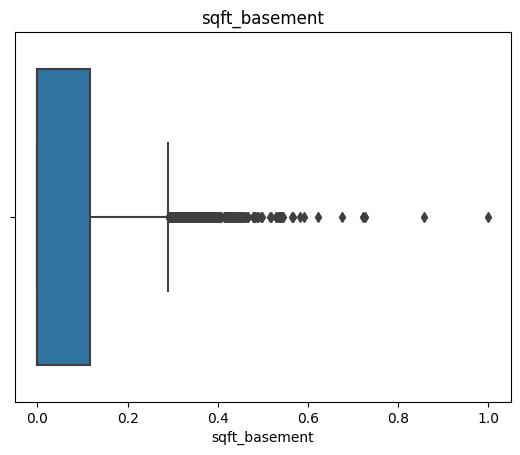

Valores do boxplot de 'sqft_basement':
  Primeiro quartil: 0.0
  Mediana: 0.0
  Terceiro quartil: 0.11618257261410789
  Máximo: 1.0



In [ ]:
# Obter as colunas numéricas do DataFrame
numeric_cols = data.select_dtypes(include='number').columns

# Plotar box plot para todas as colunas numéricas
for col in numeric_cols:
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()

    # Obter estatísticas resumidas
    stats = data[col].describe()

    print(f"Valores do boxplot de '{col}':")
    print(f"  Primeiro quartil: {stats['25%']}")
    print(f"  Mediana: {stats['50%']}")
    print(f"  Terceiro quartil: {stats['75%']}")
    print(f"  Máximo: {stats['max']}")
    print()

## **Troca dos valores continuos por valores discretos categorizados**

In [ ]:
# Definindo os intervalos e rótulos
intervalos = [0, 0.08573584905660378, 0.12226415094339622, 0.17056603773584908, float('inf')]  # Defina os intervalos desejados
rotulos = ['pouca_area_construida','media_area_construida', 'alta_area_construida', 'muito_alta_area_construida']  # Defina os rótulos para cada intervalo

# Aplicando a transformação categórica
data['sqft_living'] = pd.cut(data['sqft_living'], bins=intervalos, labels=rotulos)

# Exibindo o DataFrame resultante
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3,1.00,pouca_area_construida,0.003108,1.0,0,0,3,7,0.097588,0.000000,lower
1,3,2.25,muito_alta_area_construida,0.004072,2.0,0,0,3,7,0.206140,0.082988,lower middle
2,2,1.00,pouca_area_construida,0.005743,1.0,0,0,3,6,0.052632,0.000000,lower
3,4,3.00,alta_area_construida,0.002714,1.0,0,0,5,7,0.083333,0.188797,lower middle
4,3,2.00,media_area_construida,0.004579,1.0,0,0,3,8,0.152412,0.000000,lower middle


In [ ]:
# Definindo os intervalos e rótulos
intervalos = [0, 0.0027380017070107983, 0.004299631884151028, 0.006159595211889227, float('inf')]  # Defina os intervalos desejados
rotulos = ['terreno_pequeno', 'tereno_medio', 'terreno_grande', 'terreno_muito_grande']  # Defina os rótulos para cada intervalo

# Aplicando a transformação categórica
data['sqft_lot'] = pd.cut(data['sqft_lot'], bins=intervalos, labels=rotulos)

# Exibindo o DataFrame resultante
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3,1.00,pouca_area_construida,tereno_medio,1.0,0,0,3,7,0.097588,0.000000,lower
1,3,2.25,muito_alta_area_construida,tereno_medio,2.0,0,0,3,7,0.206140,0.082988,lower middle
2,2,1.00,pouca_area_construida,terreno_grande,1.0,0,0,3,6,0.052632,0.000000,lower
3,4,3.00,alta_area_construida,terreno_pequeno,1.0,0,0,5,7,0.083333,0.188797,lower middle
4,3,2.00,media_area_construida,terreno_grande,1.0,0,0,3,8,0.152412,0.000000,lower middle


In [ ]:
# Definindo os intervalos e rótulos
intervalos = [0, 0.09868421052631578, 0.1392543859649123, 0.21052631578947367, float('inf')]  # Defina os intervalos desejados
rotulos = ['area_superior_pequena_ou_inexistente', 'area_superior_media', 'area_superior_grande', 'area_superior_muito_grande']  # Defina os rótulos para cada intervalo

# Aplicando a transformação categórica
data['sqft_above'] = pd.cut(data['sqft_above'], bins=intervalos, labels=rotulos)

# Exibindo o DataFrame resultante
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3,1.00,pouca_area_construida,tereno_medio,1.0,0,0,3,7,area_superior_pequena_ou_inexistente,0.000000,lower
1,3,2.25,muito_alta_area_construida,tereno_medio,2.0,0,0,3,7,area_superior_grande,0.082988,lower middle
2,2,1.00,pouca_area_construida,terreno_grande,1.0,0,0,3,6,area_superior_pequena_ou_inexistente,0.000000,lower
3,4,3.00,alta_area_construida,terreno_pequeno,1.0,0,0,5,7,area_superior_pequena_ou_inexistente,0.188797,lower middle
4,3,2.00,media_area_construida,terreno_grande,1.0,0,0,3,8,area_superior_grande,0.000000,lower middle


In [ ]:
import numpy as np

# Usando numpy.where()
data['sqft_basement'] = np.where(data['sqft_basement'] == 0, 'não tem porão', 'tem porão')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3,1.00,pouca_area_construida,tereno_medio,1.0,0,0,3,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3,2.25,muito_alta_area_construida,tereno_medio,2.0,0,0,3,7,area_superior_grande,tem porão,lower middle
2,2,1.00,pouca_area_construida,terreno_grande,1.0,0,0,3,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4,3.00,alta_area_construida,terreno_pequeno,1.0,0,0,5,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3,2.00,media_area_construida,terreno_grande,1.0,0,0,3,8,area_superior_grande,não tem porão,lower middle


In [ ]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'Social Class'],
      dtype='object')

In [ ]:
data.isnull().sum() # dados faltantes ou NaN

bedrooms         0
bathrooms        0
sqft_living      1
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       1
sqft_basement    0
Social Class     0
dtype: int64

In [ ]:
# Identificar as linhas com valores NaN
linhas_nulas = data[data.isna().any(axis=1)]

# Exibir as linhas com valores NaN
print(linhas_nulas)

       bedrooms  bathrooms           sqft_living              sqft_lot  \
15743         4       1.75  alta_area_construida                   NaN   
19452         0       0.00                   NaN  terreno_muito_grande   

       floors  waterfront  view  condition  grade                  sqft_above  \
15743     1.5           0     0          3      7  area_superior_muito_grande   
19452     1.0           0     0          1      1                         NaN   

       sqft_basement  Social Class  
15743  não tem porão  upper middle  
19452  não tem porão         lower  


In [ ]:
data = data.drop(index=15743)
data = data.drop(index=19452)

In [ ]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3,1.00,pouca_area_construida,tereno_medio,1.0,0,0,3,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3,2.25,muito_alta_area_construida,tereno_medio,2.0,0,0,3,7,area_superior_grande,tem porão,lower middle
2,2,1.00,pouca_area_construida,terreno_grande,1.0,0,0,3,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4,3.00,alta_area_construida,terreno_pequeno,1.0,0,0,5,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3,2.00,media_area_construida,terreno_grande,1.0,0,0,3,8,area_superior_grande,não tem porão,lower middle


## **Troca dos valores discretos por discretos categorizados**

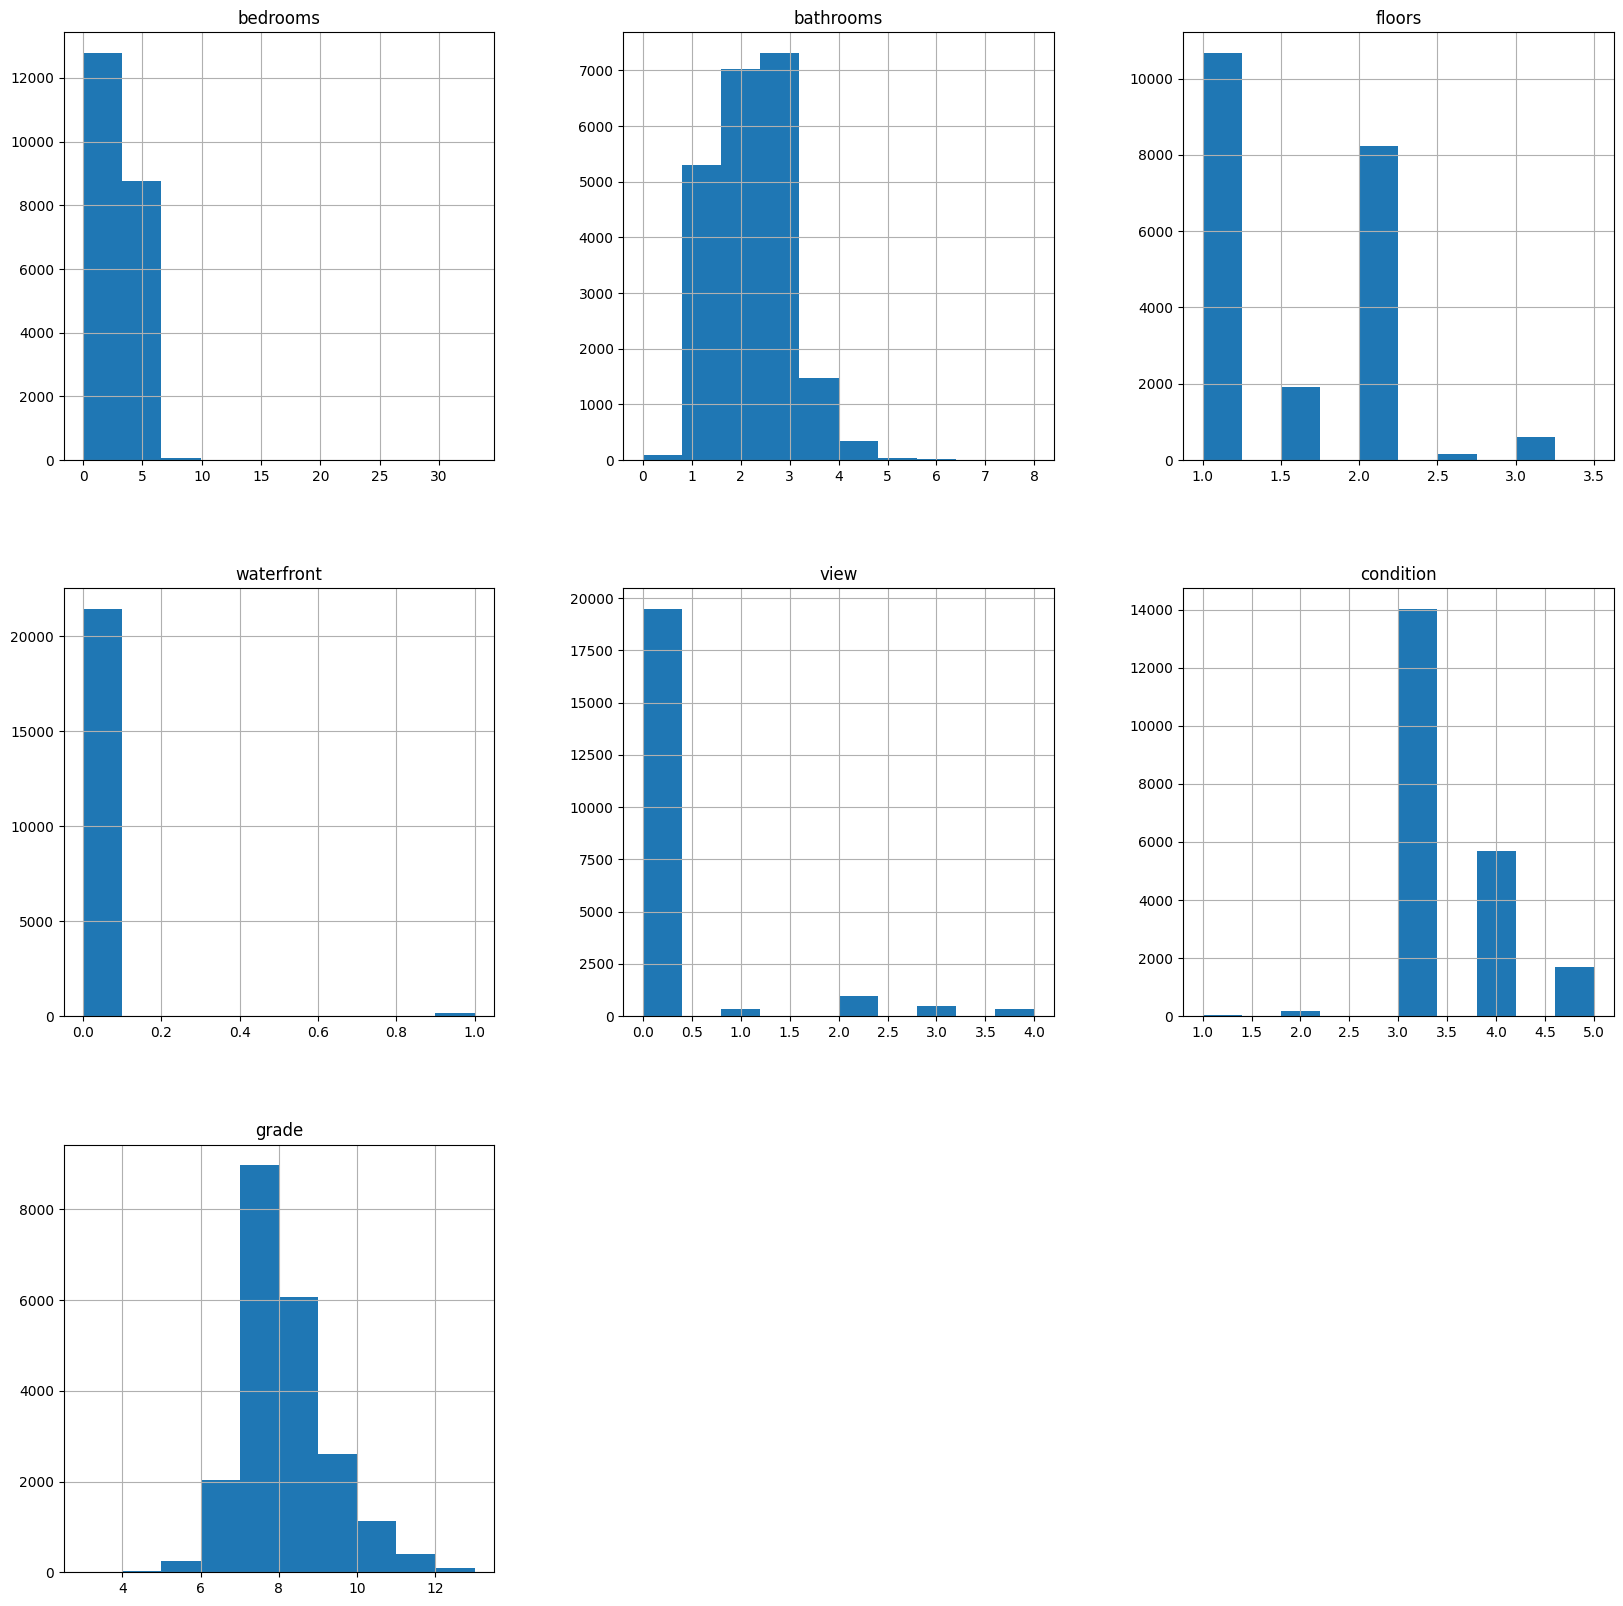

In [ ]:
# Plotar histograma para todas as colunas numéricas
data.hist(figsize=(20, 20))
plt.show()

In [ ]:
# Definindo os intervalos e rótulos
intervalos = [0, 1.01, 2.01, 3.01, float('inf')]  # Defina os intervalos desejados
rotulos = ['0_ou_1_quarto', '2_quartos', '3_quartos', '4_quartos_ou_mais']  # Defina os rótulos para cada intervalo

# Aplicando a transformação categórica
data['bedrooms'] = pd.cut(data['bedrooms'], bins=intervalos, labels=rotulos)

# Exibindo o DataFrame resultante
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,1.00,pouca_area_construida,tereno_medio,1.0,0,0,3,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3_quartos,2.25,muito_alta_area_construida,tereno_medio,2.0,0,0,3,7,area_superior_grande,tem porão,lower middle
2,2_quartos,1.00,pouca_area_construida,terreno_grande,1.0,0,0,3,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4_quartos_ou_mais,3.00,alta_area_construida,terreno_pequeno,1.0,0,0,5,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,2.00,media_area_construida,terreno_grande,1.0,0,0,3,8,area_superior_grande,não tem porão,lower middle


In [ ]:
# Definindo os intervalos e rótulos
intervalos = [0, 1.01, 2.01, 3.01, float('inf')]  # Defina os intervalos desejados
rotulos = ['0_ou_1_banheiros', 'ate_2_banheiros', 'ate_3_banheiros', 'mais_de_3_banheiros']  # Defina os rótulos para cada intervalo

# Aplicando a transformação categórica
data['bathrooms'] = pd.cut(data['bathrooms'], bins=intervalos, labels=rotulos)

# Exibindo o DataFrame resultante
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1.0,0,0,3,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3_quartos,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2.0,0,0,3,7,area_superior_grande,tem porão,lower middle
2,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1.0,0,0,3,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4_quartos_ou_mais,ate_3_banheiros,alta_area_construida,terreno_pequeno,1.0,0,0,5,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,ate_2_banheiros,media_area_construida,terreno_grande,1.0,0,0,3,8,area_superior_grande,não tem porão,lower middle


In [ ]:
# Usando numpy.where()
data['waterfront'] = np.where(data['waterfront'] == 0, 'não_possui_waterfront', 'possui_waterfront')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1.0,não_possui_waterfront,0,3,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3_quartos,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2.0,não_possui_waterfront,0,3,7,area_superior_grande,tem porão,lower middle
2,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1.0,não_possui_waterfront,0,3,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4_quartos_ou_mais,ate_3_banheiros,alta_area_construida,terreno_pequeno,1.0,não_possui_waterfront,0,5,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,ate_2_banheiros,media_area_construida,terreno_grande,1.0,não_possui_waterfront,0,3,8,area_superior_grande,não tem porão,lower middle


In [ ]:
# Obter os valores únicos da coluna específica
valores_unicos = data['floors'].unique()

# Exibir os valores únicos
print(valores_unicos)

[1.  2.  1.5 3.  2.5 3.5]


In [ ]:
# Mapeamento dos valores para os rótulos correspondentes
mapeamento = {
    1.0: '1 andar',
    2.0: '2 andares',
    1.5: '1 andar',
    3.0: '3 andares',
    2.5: '2 andares',
    3.5: '3 andares'
}

# Substituir os valores pelos rótulos correspondentes na coluna específica
data['floors'] = data['floors'].replace(mapeamento)

# Exibir o DataFrame com os rótulos correspondentes
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1 andar,não_possui_waterfront,0,3,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3_quartos,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2 andares,não_possui_waterfront,0,3,7,area_superior_grande,tem porão,lower middle
2,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,0,3,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4_quartos_ou_mais,ate_3_banheiros,alta_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,0,5,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,ate_2_banheiros,media_area_construida,terreno_grande,1 andar,não_possui_waterfront,0,3,8,area_superior_grande,não tem porão,lower middle


In [ ]:
# Obter os valores únicos da coluna específica
valores_unicos = data['view'].unique()

# Exibir os valores únicos
print(valores_unicos)

[0 3 4 2 1]


In [ ]:
# Mapeamento dos valores para os rótulos correspondentes
mapeamento = {
    0: 'vista qualidade 0',
    1: 'vista qualidade 1',
    2: 'vista qualidade 2',
    3: 'vista qualidade 3',
    4: 'vista qualidade 4',
}

# Substituir os valores pelos rótulos correspondentes na coluna específica
data['view'] = data['view'].replace(mapeamento)

# Exibir o DataFrame com os rótulos correspondentes
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1 andar,não_possui_waterfront,vista qualidade 0,3,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3_quartos,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2 andares,não_possui_waterfront,vista qualidade 0,3,7,area_superior_grande,tem porão,lower middle
2,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,vista qualidade 0,3,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4_quartos_ou_mais,ate_3_banheiros,alta_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,vista qualidade 0,5,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,ate_2_banheiros,media_area_construida,terreno_grande,1 andar,não_possui_waterfront,vista qualidade 0,3,8,area_superior_grande,não tem porão,lower middle


In [ ]:
# Obter os valores únicos da coluna específica
valores_unicos = data['condition'].unique()

# Exibir os valores únicos
print(valores_unicos)

[3 5 4 1 2]


In [ ]:
# Mapeamento dos valores para os rótulos correspondentes
mapeamento = {
    1: 'condição do imóvel 0',
    2: 'condição do imóvel 1',
    3: 'condição do imóvel 2',
    4: 'condição do imóvel 3',
    5: 'condição do imóvel 4',
}

# Substituir os valores pelos rótulos correspondentes na coluna específica
data['condition'] = data['condition'].replace(mapeamento)

# Exibir o DataFrame com os rótulos correspondentes
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3_quartos,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2 andares,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,7,area_superior_grande,tem porão,lower middle
2,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4_quartos_ou_mais,ate_3_banheiros,alta_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 4,7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,ate_2_banheiros,media_area_construida,terreno_grande,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,8,area_superior_grande,não tem porão,lower middle


In [ ]:
# Obter os valores únicos da coluna específica
valores_unicos = data['grade'].unique()

# Exibir os valores únicos
print(valores_unicos)

[ 7  6  8 11  9  5 10 12  4  3 13]


In [ ]:
# Mapeamento dos valores para os rótulos correspondentes
mapeamento = {
    3: 'qualidade da construção 3',
    4: 'qualidade da construção 4',
    5: 'qualidade da construção 5',
    6: 'qualidade da construção 6',
    7: 'qualidade da construção 7',
    8: 'qualidade da construção 8',
    9: 'qualidade da construção 9',
    10: 'qualidade da construção 10',
    11: 'qualidade da construção 11',
    12: 'qualidade da construção 12',
    13: 'qualidade da construção 13',
}

# Substituir os valores pelos rótulos correspondentes na coluna específica
data['grade'] = data['grade'].replace(mapeamento)

# Exibir o DataFrame com os rótulos correspondentes
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,qualidade da construção 7,area_superior_pequena_ou_inexistente,não tem porão,lower
1,3_quartos,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2 andares,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,qualidade da construção 7,area_superior_grande,tem porão,lower middle
2,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,qualidade da construção 6,area_superior_pequena_ou_inexistente,não tem porão,lower
3,4_quartos_ou_mais,ate_3_banheiros,alta_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 4,qualidade da construção 7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,ate_2_banheiros,media_area_construida,terreno_grande,1 andar,não_possui_waterfront,vista qualidade 0,condição do imóvel 2,qualidade da construção 8,area_superior_grande,não tem porão,lower middle


## **Histograma para verificação da distribuição de todas categorias utilizadas**

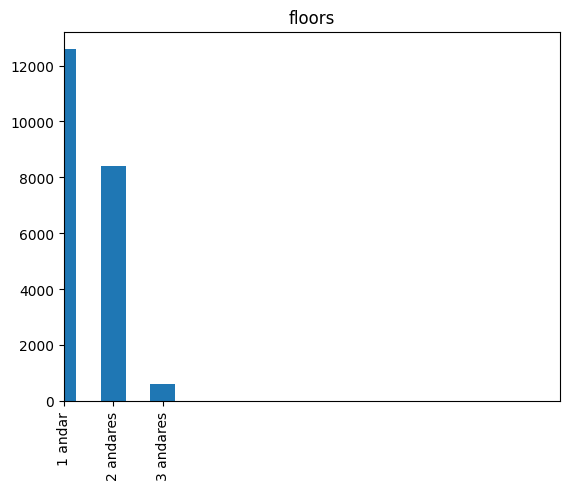

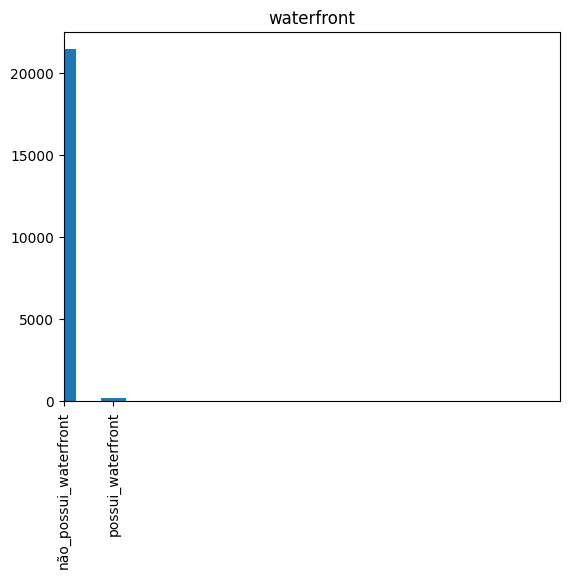

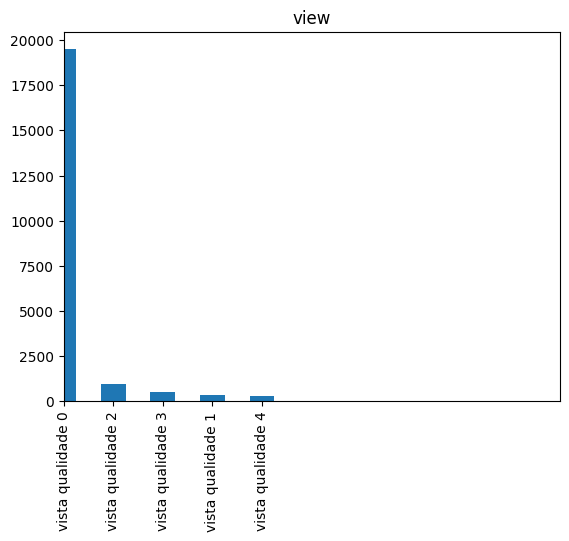

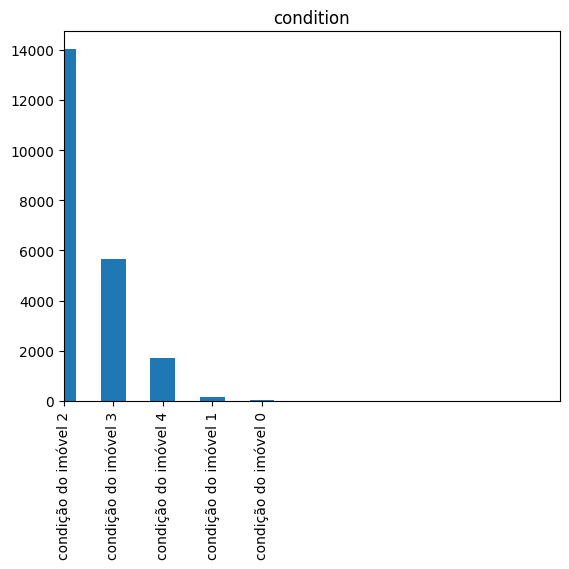

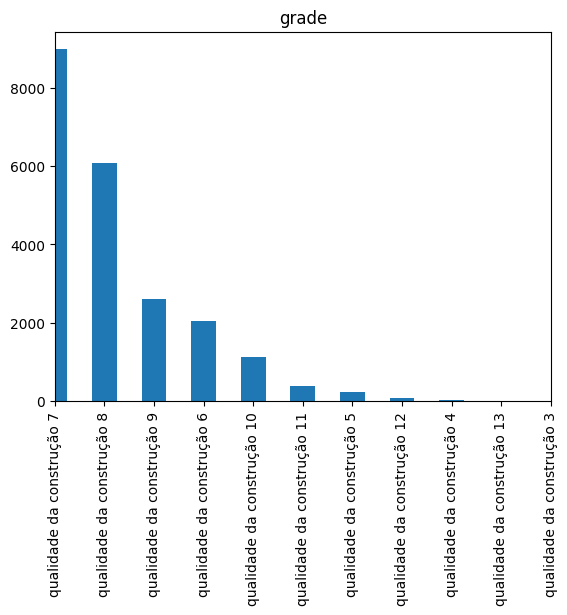

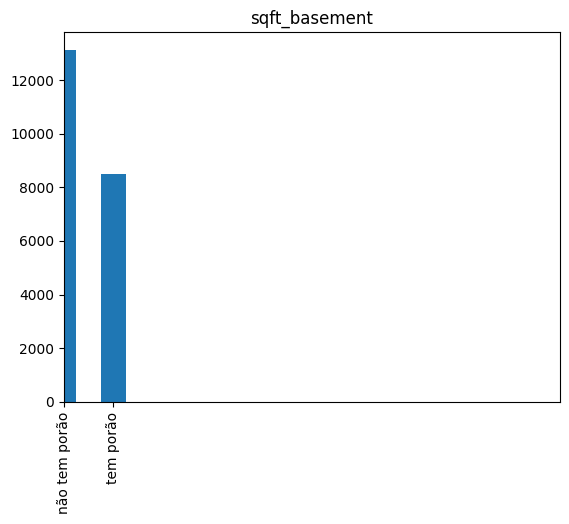

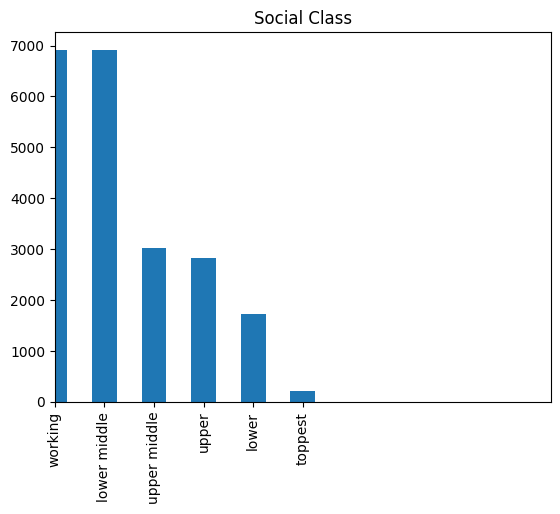

In [ ]:
import matplotlib.pyplot as plt

# Plotar gráfico de barras para todas as colunas categóricas
for col in data.select_dtypes(include='object'):
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlim(0, 10)  # Define os limites do eixo X
    plt.show()

# **Execução do algoritmo de Regra de Associação para cada uma das classes**

Rodamos o algoritmo para cada uma das classes, e encontramos as melhores regras para cada uma das classes.

Para cada uma das classes buscamos pelo menos 3 regras que definissem melhor a associação, a partir de um alinhamento entre melhor ganho entre lift, suporte e confiança, ajustando de forma empirica cada um dos parametros após a análise dos resultados globais para buscar as melhores associações.

## **Pré Processamento para Rodar Algoritmo de Regra de Associação**
Etapas necessárias para que o algoritmo funcione

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21597 non-null  category
 1   bathrooms      21600 non-null  category
 2   sqft_living    21609 non-null  category
 3   sqft_lot       21609 non-null  category
 4   floors         21609 non-null  object  
 5   waterfront     21609 non-null  object  
 6   view           21609 non-null  object  
 7   condition      21609 non-null  object  
 8   grade          21609 non-null  object  
 9   sqft_above     21609 non-null  category
 10  sqft_basement  21609 non-null  object  
 11  Social Class   21609 non-null  object  
dtypes: category(5), object(7)
memory usage: 1.4+ MB


In [ ]:
# Converter todas as colunas para o tipo "object" por requerimento do algoritmo
data = data.astype(str)

In [ ]:
# Obter os valores únicos da coluna específica
valores_unicos = data['Social Class'].unique()

# Exibir os valores únicos
print(valores_unicos)

['lower' 'lower middle' 'upper' 'working' 'upper middle' 'toppest']


In [ ]:
data = data.drop(['view'], axis=1) # remover coluna view, depois de analisar que a distribuição dela não colabora para regras de associação

In [ ]:
#importar todas as bilbiotecas necessárias para rodar o algoritmo
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

## **Lower**



O algoritmo mostra que em 40% das casas da categoria Lower, existem algumas características em comum. Essas características incluem uma área superior pequena ou inexistente, a ausência de porão, apenas um banheiro ou menos, e uma área construída reduzida. Além disso, esses itens estão presentes em conjunto em 86% dos casos analisados. O valor de associação entre essas características é de 1,6, o que indica uma forte relação entre elas.



---



*   Regra: {'area_superior_pequena_ou_inexistente', '1 andar', 'não tem porão'} -> {'lower', '0_ou_1_banheiros', 'pouca_area_construida'}
*  Suporte: 0.4104651162790698, Confiança: 0.863080684596577, Lift: 1.6031304292722597

---

*   Regra: {'não_possui_waterfront', 'area_superior_pequena_ou_inexistente', '1 andar', 'não tem porão'} -> {'lower', '0_ou_1_banheiros', 'pouca_area_construida'}
*   Suporte: 0.4104651162790698, Confiança: 0.863080684596577, Lift: 1.6031304292722597

---

*   Regra: {'area_superior_pequena_ou_inexistente', '1 andar', 'não tem porão'} -> {'lower', '0_ou_1_banheiros', 'pouca_area_construida', 'não_possui_waterfront'}
*   Suporte: 0.4104651162790698, Confiança: 0.863080684596577, Lift: 1.6031304292722597







In [ ]:
df_lower = data.query('`Social Class` == "lower"')
df_lower.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,Social Class
0,3_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 7,area_superior_pequena_ou_inexistente,não tem porão,lower
2,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 6,area_superior_pequena_ou_inexistente,não tem porão,lower
8,3_quartos,0_ou_1_banheiros,media_area_construida,tereno_medio,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 7,area_superior_pequena_ou_inexistente,tem porão,lower
18,2_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,condição do imóvel 3,qualidade da construção 7,area_superior_media,não tem porão,lower
19,3_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,condição do imóvel 3,qualidade da construção 7,area_superior_media,não tem porão,lower


In [ ]:
# Converter os dados para uma lista de transações
transactions = df_lower.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Exibir todas as regras de associação geradas
for index, rule in rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

A saída de streaming foi truncada nas últimas 5000 linhas.
Suporte: 0.10058139534883721, Confiança: 0.20521945432977462, Lift: 1.4175801664546681
---
Regra: {'não tem porão', 'lower', 'area_superior_pequena_ou_inexistente', '1 andar'} -> {'pouca_area_construida', 'qualidade da construção 6', 'não_possui_waterfront', 'tereno_medio'}
Suporte: 0.10058139534883721, Confiança: 0.2114914425427873, Lift: 1.6534785507890641
---
Regra: {'não tem porão', 'lower', 'não_possui_waterfront', 'tereno_medio'} -> {'pouca_area_construida', 'qualidade da construção 6', 'area_superior_pequena_ou_inexistente', '1 andar'}
Suporte: 0.10058139534883721, Confiança: 0.3844444444444444, Lift: 1.4129154795821461
---
Regra: {'não tem porão', 'pouca_area_construida', 'lower', 'não_possui_waterfront'} -> {'1 andar', 'qualidade da construção 6', 'area_superior_pequena_ou_inexistente', 'tereno_medio'}
Suporte: 0.10058139534883721, Confiança: 0.14661016949152542, Lift: 1.2671833744996166
---
Regra: {'não tem porão', 'l

In [ ]:
# Converter os dados para uma lista de transações
transactions = df_lower.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

filtered_rules = rules[(rules['support'] > 0.4) & (rules['confidence'] > 0.85) & (rules['consequents'].apply(lambda x: 'lower' in x)) & (rules['lift'] > 1.55)]

# Exibir as regras filtradas
for index, rule in filtered_rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')


Regra: {'não tem porão', 'area_superior_pequena_ou_inexistente', '1 andar'} -> {'0_ou_1_banheiros', 'pouca_area_construida', 'lower'}
Suporte: 0.4104651162790698, Confiança: 0.863080684596577, Lift: 1.6031304292722597
---
Regra: {'não_possui_waterfront', 'não tem porão', 'area_superior_pequena_ou_inexistente', '1 andar'} -> {'0_ou_1_banheiros', 'pouca_area_construida', 'lower'}
Suporte: 0.4104651162790698, Confiança: 0.863080684596577, Lift: 1.6031304292722597
---
Regra: {'não tem porão', 'area_superior_pequena_ou_inexistente', '1 andar'} -> {'0_ou_1_banheiros', 'pouca_area_construida', 'lower', 'não_possui_waterfront'}
Suporte: 0.4104651162790698, Confiança: 0.863080684596577, Lift: 1.6031304292722597
---


## **Working**


O algoritmo revela que 30% das casas classificadas como "working" possuem algumas características em comum. Essas características são: ter até 2 banheiros, não possuir vista para o mar (waterfront) e possuir apenas 1 andar. Além disso, essas características ocorrem em conjunto em 85% dos casos analisados. O valor de associação entre essas características é de 1.3, o que indica que a ocorrência do consequente é 30% mais provável com base nas regras estabelecidas pelo algoritmo de associação. Em outras palavras, se uma casa tiver 2 banheiros, ela tem uma probabilidade 30% maior de ter apenas 1 andar e ser classificada como "working", de acordo com as informações fornecidas pelo algoritmo de regras de associação.

---


*  Regra: {'ate_2_banheiros'} -> {'1 andar', 'working'}
*  Suporte: 0.3073255309926311, Confiança: 0.8593939393939394, Lift: 1.3029278104152144

---

*  Regra: {'ate_2_banheiros', 'não_possui_waterfront'} -> {'1 andar', 'working'}
*  Suporte: 0.30718104320184947, Confiança: 0.8593371059013744, Lift: 1.3028416451135623

---

*  Regra: {'ate_2_banheiros'} -> {'1 andar', 'não_possui_waterfront', 'working'}
*  Suporte: 0.30718104320184947, Confiança: 0.8589898989898991, Lift: 1.3043152898001518


In [ ]:
df_working = data.query('`Social Class` == "working"')
df_working.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,Social Class
6,3_quartos,ate_3_banheiros,media_area_construida,tereno_medio,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 7,area_superior_grande,não tem porão,working
7,3_quartos,ate_2_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 7,area_superior_pequena_ou_inexistente,não tem porão,working
9,3_quartos,ate_3_banheiros,media_area_construida,tereno_medio,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 7,area_superior_grande,não tem porão,working
12,3_quartos,0_ou_1_banheiros,media_area_construida,terreno_muito_grande,1 andar,não_possui_waterfront,condição do imóvel 3,qualidade da construção 7,area_superior_media,não tem porão,working
16,3_quartos,ate_2_banheiros,media_area_construida,terreno_muito_grande,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 7,area_superior_grande,não tem porão,working


In [ ]:
# Converter os dados para uma lista de transações
transactions = df_working.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Exibir todas as regras de associação
for index, rule in rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

Regra: {'3_quartos'} -> {'1 andar'}
Suporte: 0.36078601358185236, Confiança: 0.6861775212970597, Lift: 1.0403142661329572
---
Regra: {'1 andar'} -> {'3_quartos'}
Suporte: 0.36078601358185236, Confiança: 0.5469879518072289, Lift: 1.0403142661329572
---
Regra: {'ate_2_banheiros'} -> {'1 andar'}
Suporte: 0.3073255309926311, Confiança: 0.8593939393939394, Lift: 1.3029278104152144
---
Regra: {'1 andar'} -> {'ate_2_banheiros'}
Suporte: 0.3073255309926311, Confiança: 0.4659364731653888, Lift: 1.3029278104152144
---
Regra: {'1 andar'} -> {'qualidade da construção 7'}
Suporte: 0.4256610316428262, Confiança: 0.6453450164293538, Lift: 1.0851391785003783
---
Regra: {'qualidade da construção 7'} -> {'1 andar'}
Suporte: 0.4256610316428262, Confiança: 0.7157434402332361, Lift: 1.0851391785003783
---
Regra: {'working'} -> {'1 andar'}
Suporte: 0.6595867649183644, Confiança: 0.6595867649183644, Lift: 1.0
---
Regra: {'1 andar'} -> {'working'}
Suporte: 0.6595867649183644, Confiança: 1.0, Lift: 1.0
---
Reg

In [ ]:
# Converter os dados para uma lista de transações
transactions = df_working.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

filtered_rules = rules[(rules['support'] > 0.3) & (rules['confidence'] > 0.85) & (rules['consequents'].apply(lambda x: 'working' in x)) & (rules['lift'] > 1.3)]

# Exibir as regras filtradas
for index, rule in filtered_rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

Regra: {'ate_2_banheiros'} -> {'working', '1 andar'}
Suporte: 0.3073255309926311, Confiança: 0.8593939393939394, Lift: 1.3029278104152144
---
Regra: {'não_possui_waterfront', 'ate_2_banheiros'} -> {'working', '1 andar'}
Suporte: 0.30718104320184947, Confiança: 0.8593371059013744, Lift: 1.3028416451135623
---
Regra: {'ate_2_banheiros'} -> {'working', 'não_possui_waterfront', '1 andar'}
Suporte: 0.30718104320184947, Confiança: 0.8589898989898991, Lift: 1.3043152898001518
---


## **Lower Middle**


O algoritmo revela que mais de 30% dos casos analisados mostram uma relação entre algumas características específicas de uma casa. Essas características são: ter 2 andares e a propriedade ter uma classificação de condição igual a 2. Além disso, há uma confiança de 86% de que essa relação ocorra no grupo chamado "lower middle" quando todas as outras condições também são satisfeitas.

---

*  Regra: {'2 andares'} -> {'lower middle', 'condição do imóvel 2'}
*  Suporte: 0.31983805668016196, Confiança: 0.8630511119781507, Lift: 1.2922410674260425

---

*  Regra: {'2 andares', 'não_possui_waterfront'} -> {'lower middle', 'condição do imóvel 2'}
*  Suporte: 0.31954887218045114, Confiança: 0.86328125, Lift: 1.2925856516562026

---

*  Regra: {'2 andares'} -> {'condição do imóvel 2', 'lower middle', 'não_possui_waterfront'}
*  Suporte: 0.31954887218045114, Confiança: 0.8622707764338666, Lift: 1.2924717576542308



In [ ]:
df_lower_middle = data.query('`Social Class` == "lower middle"')
df_lower_middle.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,Social Class
1,3_quartos,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 7,area_superior_grande,tem porão,lower middle
3,4_quartos_ou_mais,ate_3_banheiros,alta_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,condição do imóvel 4,qualidade da construção 7,area_superior_pequena_ou_inexistente,tem porão,lower middle
4,3_quartos,ate_2_banheiros,media_area_construida,terreno_grande,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 8,area_superior_grande,não tem porão,lower middle
11,2_quartos,0_ou_1_banheiros,pouca_area_construida,tereno_medio,1 andar,não_possui_waterfront,condição do imóvel 3,qualidade da construção 7,area_superior_pequena_ou_inexistente,tem porão,lower middle
13,3_quartos,ate_2_banheiros,pouca_area_construida,terreno_grande,1 andar,não_possui_waterfront,condição do imóvel 3,qualidade da construção 7,area_superior_media,não tem porão,lower middle


In [ ]:
# Converter os dados para uma lista de transações
transactions = df_lower_middle.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Exibir todas as regras de associação
for index, rule in rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

A saída de streaming foi truncada nas últimas 5000 linhas.
Suporte: 0.14415847310584154, Confiança: 0.5871613663133098, Lift: 2.880005680441738
---
Regra: {'2 andares', 'não tem porão', 'lower middle', 'area_superior_muito_grande'} -> {'condição do imóvel 2', 'não_possui_waterfront'}
Suporte: 0.14415847310584154, Confiança: 0.9014466546112115, Lift: 1.351193121649575
---
Regra: {'não tem porão', 'condição do imóvel 2', 'lower middle', 'não_possui_waterfront'} -> {'2 andares', 'area_superior_muito_grande'}
Suporte: 0.14415847310584154, Confiança: 0.3563259471050751, Lift: 2.00516700584109
---
Regra: {'não tem porão', 'lower middle', 'não_possui_waterfront', 'area_superior_muito_grande'} -> {'2 andares', 'condição do imóvel 2'}
Suporte: 0.14415847310584154, Confiança: 0.7982385908726982, Lift: 2.4957586322222336
---
Regra: {'não tem porão', 'condição do imóvel 2', 'lower middle', 'area_superior_muito_grande'} -> {'2 andares', 'não_possui_waterfront'}
Suporte: 0.14415847310584154, Confian

In [ ]:
# Converter os dados para uma lista de transações
transactions = df_lower_middle.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filtrar as regras com suporte maior que 0.8, confiança maior que 0.8, consequente 'lower' e lift maior que 1.1 ou menor que 0.9
filtered_rules = rules[(rules['support'] > 0.3) & (rules['confidence'] > 0.8) & (rules['consequents'].apply(lambda x: 'lower middle' in x)) & ((rules['lift'] > 1.2))]

# Exibir as regras filtradas
for index, rule in filtered_rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')


Regra: {'2 andares'} -> {'condição do imóvel 2', 'lower middle'}
Suporte: 0.31983805668016196, Confiança: 0.8630511119781507, Lift: 1.2922410674260425
---
Regra: {'2 andares', 'não_possui_waterfront'} -> {'condição do imóvel 2', 'lower middle'}
Suporte: 0.31954887218045114, Confiança: 0.86328125, Lift: 1.2925856516562026
---
Regra: {'2 andares'} -> {'condição do imóvel 2', 'lower middle', 'não_possui_waterfront'}
Suporte: 0.31954887218045114, Confiança: 0.8622707764338666, Lift: 1.2924717576542308
---


## **Upper Middle**

O algoritmo revela que em mais de 30% dos casos analisados, uma casa com as seguintes características específicas ocorre: possui 2 andares, não possui porão e possui uma área superior muito grande. Além disso, existe uma confiança de 86% de que essa combinação ocorra no grupo chamado "upper middle". O valor de "lift" é de 2, o que indica que a probabilidade do consequente ocorrer é duas vezes maior quando o antecedente também ocorre.

---

*  Regra: {'2 andares', 'não tem porão'} -> {'upper middle', 'area_superior_muito_grande'}
*  Suporte: 0.32361709175223585, Confiança: 0.8547681539807525, Lift: 2.0303265592981052
---

*  Regra: {'não_possui_waterfront', '2 andares', 'não tem porão'} -> {'upper middle', 'area_superior_muito_grande'}
*  Suporte: 0.31954887218045114, Confiança: 0.86328125, Lift: 1.2925856516562026

---

*  Regra: {'2 andares', 'não tem porão'} -> {'upper middle', 'area_superior_muito_grande', 'não_possui_waterfront'}
*  Suporte: 0.32361709175223585, Confiança: 0.8525305410122164, Lift: 2.0298026051387077


In [ ]:
df_upper_middle = data.query('`Social Class` == "upper middle"')
df_upper_middle.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,Social Class
15,4_quartos_ou_mais,ate_3_banheiros,muito_alta_area_construida,terreno_pequeno,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 9,area_superior_grande,tem porão,upper middle
27,3_quartos,0_ou_1_banheiros,pouca_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,condição do imóvel 4,qualidade da construção 8,area_superior_media,não tem porão,upper middle
29,4_quartos_ou_mais,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 8,area_superior_muito_grande,não tem porão,upper middle
32,4_quartos_ou_mais,ate_2_banheiros,alta_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,condição do imóvel 3,qualidade da construção 7,area_superior_media,tem porão,upper middle
35,3_quartos,ate_3_banheiros,alta_area_construida,terreno_pequeno,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 8,area_superior_media,tem porão,upper middle


In [ ]:
# Converter os dados para uma lista de transações
transactions = df_upper_middle.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Exibir todas as regras de associação
for index, rule in rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

Regra: {'tem porão'} -> {'1 andar'}
Suporte: 0.3269294468367009, Confiança: 0.7152173913043478, Lift: 1.5313768115942028
---
Regra: {'1 andar'} -> {'tem porão'}
Suporte: 0.3269294468367009, Confiança: 0.7, Lift: 1.5313768115942028
---
Regra: {'1 andar'} -> {'upper middle'}
Suporte: 0.46704206690957273, Confiança: 1.0, Lift: 1.0
---
Regra: {'upper middle'} -> {'1 andar'}
Suporte: 0.46704206690957273, Confiança: 0.46704206690957273, Lift: 1.0
---
Regra: {'2 andares'} -> {'4_quartos_ou_mais'}
Suporte: 0.32891685988737995, Confiança: 0.6511475409836066, Lift: 1.1870860061772393
---
Regra: {'4_quartos_ou_mais'} -> {'2 andares'}
Suporte: 0.32891685988737995, Confiança: 0.5996376811594203, Lift: 1.1870860061772393
---
Regra: {'2 andares'} -> {'area_superior_muito_grande'}
Suporte: 0.3739648890361047, Confiança: 0.7403278688524592, Lift: 1.7584971172821198
---
Regra: {'area_superior_muito_grande'} -> {'2 andares'}
Suporte: 0.3739648890361047, Confiança: 0.8882769472856019, Lift: 1.758497117282

In [ ]:
# Converter os dados para uma lista de transações
transactions = df_upper_middle.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

filtered_rules = rules[(rules['support'] > 0.3) & (rules['confidence'] > 0.8) & (rules['consequents'].apply(lambda x: 'upper middle' in x)) & (rules['lift'] > 2.0)]

# Exibir as regras filtradas
for index, rule in filtered_rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

Regra: {'2 andares', 'não tem porão'} -> {'area_superior_muito_grande', 'upper middle'}
Suporte: 0.32427956276912884, Confiança: 0.8542757417102966, Lift: 2.0291569348728444
---
Regra: {'2 andares', 'não tem porão', 'não_possui_waterfront'} -> {'area_superior_muito_grande', 'upper middle'}
Suporte: 0.32361709175223585, Confiança: 0.8547681539807525, Lift: 2.0303265592981052
---
Regra: {'2 andares', 'não tem porão'} -> {'não_possui_waterfront', 'area_superior_muito_grande', 'upper middle'}
Suporte: 0.32361709175223585, Confiança: 0.8525305410122164, Lift: 2.0298026051387077
---


## **Upper**


O algoritmo revela que mais de 50% das casas na categoria "Upper" possuem uma combinação específica de características. Essas características incluem ter 2 andares, uma área superior muito grande e uma área construída ampla. Além disso, há uma confiança de 90% de que essa combinação ocorra nessas casas. O valor de "lift" é de 40%, o que indica uma forte relação entre essas características.

---

*  Regra: {'muito_alta_area_construida', '2 andares'} -> {'upper', 'area_superior_muito_grande'}
*  Suporte: 0.5076376554174068, Confiança: 0.9142674344209855, Lift: 1.410999357398615
---

*  Regra: {'muito_alta_area_construida', '2 andares', 'não_possui_waterfront'} -> {'upper', 'area_superior_muito_grande'}
*  Suporte: 0.5019538188277087, Confiança: 0.9163424124513619, Lift: 1.4142016946549254
---

*  Regra: {'muito_alta_area_construida', '2 andares'} -> {'upper', 'area_superior_muito_grande', 'não_possui_waterfront'}
*  Suporte: 0.5019538188277087, Confiança: 0.9040307101727448, Lift: 1.4169523658887955


In [ ]:
df_upper = data.query('`Social Class` == "upper"')
df_upper.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,Social Class
5,4_quartos_ou_mais,mais_de_3_banheiros,muito_alta_area_construida,terreno_muito_grande,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 11,area_superior_muito_grande,tem porão,upper
26,3_quartos,ate_2_banheiros,alta_area_construida,terreno_pequeno,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 8,area_superior_grande,tem porão,upper
42,4_quartos_ou_mais,ate_3_banheiros,muito_alta_area_construida,tereno_medio,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 9,area_superior_muito_grande,não tem porão,upper
49,3_quartos,ate_3_banheiros,muito_alta_area_construida,terreno_muito_grande,1 andar,possui_waterfront,condição do imóvel 4,qualidade da construção 9,area_superior_grande,tem porão,upper
54,4_quartos_ou_mais,ate_3_banheiros,muito_alta_area_construida,tereno_medio,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 8,area_superior_grande,tem porão,upper


In [ ]:
# Converter os dados para uma lista de transações
transactions = df_upper.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Exibir todas as regras de associação
for index, rule in rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

A saída de streaming foi truncada nas últimas 5000 linhas.
Suporte: 0.3630550621669627, Confiança: 0.5603070175438596, Lift: 1.5433114035087718
---
Regra: {'muito_alta_area_construida', 'não_possui_waterfront', 'upper'} -> {'area_superior_muito_grande'}
Suporte: 0.5925399644760213, Confiança: 0.7890255439924314, Lift: 1.2177121197032315
---
Regra: {'muito_alta_area_construida', 'não_possui_waterfront', 'area_superior_muito_grande'} -> {'upper'}
Suporte: 0.5925399644760213, Confiança: 1.0, Lift: 1.0
---
Regra: {'muito_alta_area_construida', 'upper', 'area_superior_muito_grande'} -> {'não_possui_waterfront'}
Suporte: 0.5925399644760213, Confiança: 0.9863985807214666, Lift: 1.011921284522933
---
Regra: {'não_possui_waterfront', 'upper', 'area_superior_muito_grande'} -> {'muito_alta_area_construida'}
Suporte: 0.5925399644760213, Confiança: 0.9287305122494431, Lift: 1.2103594407324918
---
Regra: {'muito_alta_area_construida', 'não_possui_waterfront'} -> {'upper', 'area_superior_muito_grande

In [ ]:
# Converter os dados para uma lista de transações
transactions = df_upper.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

filtered_rules = rules[(rules['support'] > 0.5) & (rules['confidence'] > 0.9) & (rules['consequents'].apply(lambda x: 'upper' in x)) & (rules['lift'] > 1.3)]

# Exibir as regras filtradas
for index, rule in filtered_rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')


Regra: {'2 andares', 'muito_alta_area_construida'} -> {'upper', 'area_superior_muito_grande'}
Suporte: 0.5076376554174068, Confiança: 0.9142674344209855, Lift: 1.410999357398615
---
Regra: {'2 andares', 'muito_alta_area_construida', 'não_possui_waterfront'} -> {'upper', 'area_superior_muito_grande'}
Suporte: 0.5019538188277087, Confiança: 0.9163424124513619, Lift: 1.4142016946549254
---
Regra: {'2 andares', 'muito_alta_area_construida'} -> {'não_possui_waterfront', 'upper', 'area_superior_muito_grande'}
Suporte: 0.5019538188277087, Confiança: 0.9040307101727448, Lift: 1.4169523658887955
---


## **Toppest**

O algoritmo revela que mais de 30% das casas pertencentes a um cluster específico possuem algumas características em comum. Essas características incluem a presença de um porão, uma condição do imóvel classificada como nível 2, além de ter mais de 3 banheiros e 4 quartos ou mais. Além disso, há uma confiança de 95% de que essas características ocorram juntas nesse grupo.

Esse grupo de casas é bastante distinto dos demais, apresentando características muito destacadas. É naturalmente diferente dos outros grupos analisados.

---

*  Regra: {'condição do imóvel 2', 'tem porão', 'area_superior_muito_grande', '4_quartos_ou_mais'} -> {'toppest', 'mais_de_3_banheiros'}
*  Suporte: 0.3119266055045872, Confiança: 0.9577464788732395, Lift: 1.250231930505187
---

*  Regra: {'tem porão', 'area_superior_muito_grande', 'muito_alta_area_construida', 'condição do imóvel 2', '4_quartos_ou_mais'} -> {'toppest', 'mais_de_3_banheiros'}
*  Suporte: 0.3119266055045872, Confiança: 0.9577464788732395, Lift: 1.250231930505187
---

*  Regra: {'condição do imóvel 2', 'tem porão', 'area_superior_muito_grande', '4_quartos_ou_mais'} -> {'muito_alta_area_construida', 'toppest', 'mais_de_3_banheiros'}
*  Suporte: 0.3119266055045872, Confiança: 0.9577464788732395, Lift: 1.250231930505187


In [ ]:
df_toppest = data.query('`Social Class` == "toppest"')
df_toppest.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,Social Class
21,3_quartos,ate_3_banheiros,muito_alta_area_construida,terreno_muito_grande,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 9,area_superior_muito_grande,tem porão,toppest
153,4_quartos_ou_mais,mais_de_3_banheiros,muito_alta_area_construida,terreno_muito_grande,2 andares,não_possui_waterfront,condição do imóvel 2,qualidade da construção 12,area_superior_muito_grande,tem porão,toppest
246,4_quartos_ou_mais,ate_3_banheiros,muito_alta_area_construida,terreno_grande,1 andar,possui_waterfront,condição do imóvel 2,qualidade da construção 9,area_superior_grande,tem porão,toppest
269,4_quartos_ou_mais,mais_de_3_banheiros,muito_alta_area_construida,terreno_muito_grande,1 andar,não_possui_waterfront,condição do imóvel 2,qualidade da construção 11,area_superior_muito_grande,tem porão,toppest
282,4_quartos_ou_mais,ate_3_banheiros,muito_alta_area_construida,terreno_grande,2 andares,não_possui_waterfront,condição do imóvel 4,qualidade da construção 9,area_superior_muito_grande,tem porão,toppest


In [ ]:
# Converter os dados para uma lista de transações
transactions = df_toppest.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Exibir todas as regras de associação
for index, rule in rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

A saída de streaming foi truncada nas últimas 5000 linhas.
Suporte: 0.3486238532110092, Confiança: 0.5891472868217055, Lift: 1.234943351222421
---
Regra: {'2 andares', 'toppest', 'não_possui_waterfront', 'condição do imóvel 2'} -> {'muito_alta_area_construida', 'area_superior_muito_grande', 'mais_de_3_banheiros'}
Suporte: 0.3486238532110092, Confiança: 0.8941176470588236, Lift: 1.181319073083779
---
Regra: {'2 andares', 'toppest', 'não_possui_waterfront', 'area_superior_muito_grande'} -> {'condição do imóvel 2', 'muito_alta_area_construida', 'mais_de_3_banheiros'}
Suporte: 0.3486238532110092, Confiança: 0.6031746031746033, Lift: 1.1740362811791385
---
Regra: {'2 andares', 'toppest', 'condição do imóvel 2', 'area_superior_muito_grande'} -> {'muito_alta_area_construida', 'não_possui_waterfront', 'mais_de_3_banheiros'}
Suporte: 0.3486238532110092, Confiança: 0.7238095238095239, Lift: 1.1863945578231294
---
Regra: {'toppest', 'não_possui_waterfront', 'condição do imóvel 2', 'area_superior_

In [ ]:
# Converter os dados para uma lista de transações
transactions = df_toppest.values.tolist()

# Inicializar o codificador de transações
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Converter os dados codificados de volta para um DataFrame
df_encoded = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# Gerar regras de associação
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

filtered_rules = rules[(rules['support'] > 0.3) & (rules['confidence'] > 0.9) & (rules['consequents'].apply(lambda x: 'toppest' in x)) & (rules['lift'] > 1.25)]

# Exibir as regras filtradas
for index, rule in filtered_rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}")
    print(f"Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")
    print('---')

Regra: {'4_quartos_ou_mais', 'condição do imóvel 2', 'tem porão', 'area_superior_muito_grande'} -> {'toppest', 'mais_de_3_banheiros'}
Suporte: 0.3119266055045872, Confiança: 0.9577464788732395, Lift: 1.250231930505187
---
Regra: {'4_quartos_ou_mais', 'condição do imóvel 2', 'muito_alta_area_construida', 'tem porão', 'area_superior_muito_grande'} -> {'toppest', 'mais_de_3_banheiros'}
Suporte: 0.3119266055045872, Confiança: 0.9577464788732395, Lift: 1.250231930505187
---
Regra: {'4_quartos_ou_mais', 'condição do imóvel 2', 'tem porão', 'area_superior_muito_grande'} -> {'toppest', 'muito_alta_area_construida', 'mais_de_3_banheiros'}
Suporte: 0.3119266055045872, Confiança: 0.9577464788732395, Lift: 1.250231930505187
---
